<a href="https://colab.research.google.com/github/ana0212-if/ana0212-if/blob/main/Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
georgekurokijr_dl_2024_path = kagglehub.dataset_download('georgekurokijr/dl-2024')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dl-2024/dadosTextosCientificos.tsv


In [ ]:
# Remover linhas onde 'Descricao_pública' é NaN
df = df.dropna(subset=['Descricao_pública'])


                                         Título_Público  \
0     Açúcar de frutas e aplicação em bolos como sub...   
1     Desenvolver uma linha de farofas com castanhas...   
2     Desenvolvimento de cobertura líquida para sorvete   
3          Desenvolvimento de conserva de tomate cereja   
4     Desenvolvimento de massa alimentícia enriqueci...   
...                                                 ...   
2720  Desenvolvimento de ativos biotecnológicos para...   
2721                                      SIMA MV POWER   
2722                           Talhonameno Ótimo Klabin   
2723  Tecnologia de Quantificação de Estoque de Carb...   
2724  Desenvolvimento de Plataforma Digital de Bioi...   

                                      Descricao_pública  Cluster  
0     O uso de inovações tecnológicas auxilia as ind...        1  
1     O uso de inovações tecnológicas auxilia as ind...        1  
2     O Brasil é considerado um país com a maior bio...        2  
3     O Brasil é consid

                                      Título_Público  \
0  Açúcar de frutas e aplicação em bolos como sub...   
1  Desenvolver uma linha de farofas com castanhas...   
2  Desenvolvimento de cobertura líquida para sorvete   
3       Desenvolvimento de conserva de tomate cereja   
4  Desenvolvimento de massa alimentícia enriqueci...   

                                   Descricao_pública  
0  O uso de inovações tecnológicas auxilia as ind...  
1  O uso de inovações tecnológicas auxilia as ind...  
2  O Brasil é considerado um país com a maior bio...  
3  O Brasil é considerado o país com maior biodiv...  
4  Nos últimos anos a comunidade científica tem d...  


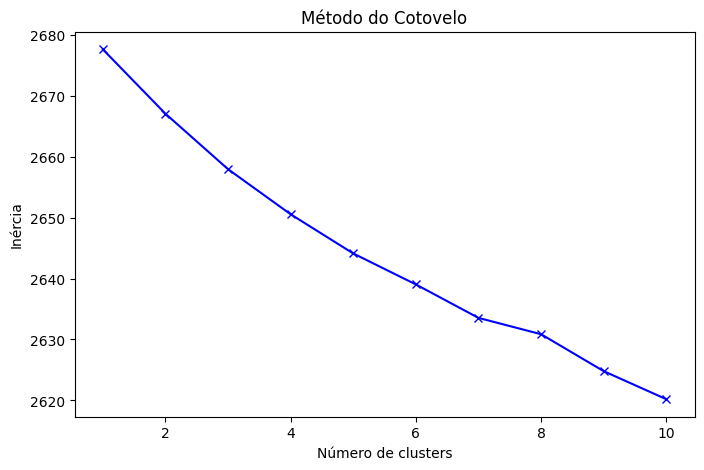

                                         Título_Público  \
0     Açúcar de frutas e aplicação em bolos como sub...   
1     Desenvolver uma linha de farofas com castanhas...   
2     Desenvolvimento de cobertura líquida para sorvete   
3          Desenvolvimento de conserva de tomate cereja   
4     Desenvolvimento de massa alimentícia enriqueci...   
...                                                 ...   
2720  Desenvolvimento de ativos biotecnológicos para...   
2721                                      SIMA MV POWER   
2722                           Talhonameno Ótimo Klabin   
2723  Tecnologia de Quantificação de Estoque de Carb...   
2724  Desenvolvimento de Plataforma Digital de Bioi...   

                                      Descricao_pública  Cluster  
0     O uso de inovações tecnológicas auxilia as ind...        1  
1     O uso de inovações tecnológicas auxilia as ind...        1  
2     O Brasil é considerado um país com a maior bio...        2  
3     O Brasil é consid

In [ ]:
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('/kaggle/input/dl-2024/dadosTextosCientificos.tsv', encoding='latin1', sep='\t')

# Remover linhas onde 'Descricao_pública' é NaN
df = df.dropna(subset=['Descricao_pública'])

# Exibir as primeiras linhas do dataset
print(df.head())

# Criar uma lista de palavras de parada em português
stop_words_portuguese = ['a', 'o', 'e', 'que', 'de', 'do', 'da', 'em', 'um', 'para', 'na', 'no', 'com', 'se', 'do', 'dos', 'das', 'como', 'mas', 'mais', 'ainda', 'isso', 'aquilo']

# 1. Criar um vetor de TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words_portuguese)
X = vectorizer.fit_transform(df['Descricao_pública'])

# 2. Método do Cotovelo para encontrar o número ideal de clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# 3. Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

# 4. Definir o número de clusters ideal (substitua 'ideal_k' pelo valor que você encontrou)
ideal_k = 3  # Exemplo
kmeans = KMeans(n_clusters=ideal_k, n_init=10, random_state=0)
kmeans.fit(X)

# 5. Adicionar os rótulos de cluster ao dataframe
df['Cluster'] = kmeans.labels_

# 6. Exibir os resultados
print(df[['Título_Público', 'Descricao_pública', 'Cluster']])


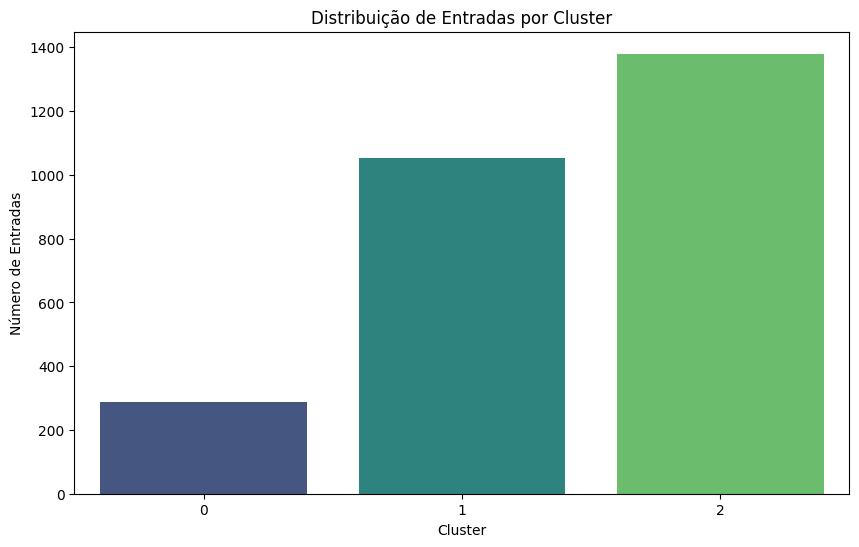

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemplo: Contagem de entradas por cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', palette='viridis')
plt.title('Distribuição de Entradas por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Entradas')
plt.show()


In [ ]:
# Obter os centroides
centroids = kmeans.cluster_centers_

# Se você fez a transformação TF-IDF, use o vetor correspondente
features = vectorizer.get_feature_names_out()
for i, centroid in enumerate(centroids):
    top_features_indices = centroid.argsort()[-10:][::-1]  # As 10 principais características
    top_features = [features[j] for j in top_features_indices]
    print(f"Cluster {i}: {top_features}")


Cluster 0: ['software', 'solução', 'plataforma', 'desenvolvimento', 'uma', 'dispositivos', 'gerenciamento', 'embarcado', 'pesquisa', 'dados']
Cluster 1: ['projeto', 'uma', 'objetivo', 'por', 'os', 'tem', 'as', 'este', 'desenvolvimento', 'processo']
Cluster 2: ['desenvolvimento', 'sistema', 'desenvolver', 'processo', 'produção', 'uma', 'aplicação', 'protótipo', 'controle', 'partir']


In [ ]:
from sklearn.metrics import silhouette_score

# Calcule o Silhouette Score
score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.003118435904047088


In [ ]:
print(df.columns)


Index(['Título_Público', 'Descricao_pública', 'Cluster'], dtype='object')


In [ ]:
# Variáveis independentes (X) e dependentes (y)
X = df[['Título_Público', 'Descricao_pública']]  # Use os textos como variáveis independentes
y = df['Cluster']  # Use a coluna de cluster como variável dependenteriável dependente


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Defina suas stop words em português
stop_words_portuguese = [
    'a', 'o', 'e', 'que', 'de', 'do', 'da', 'em', 'um', 'para',
    'na', 'no', 'com', 'se', 'dos', 'das', 'como', 'mas',
    'mais', 'ainda', 'isso', 'aquilo', 'é', 'um', 'uma',
    'ao', 'dois', 'três', 'já', 'até', 'toda', 'todas',
    'todo', 'todos'
]

# 1. Transformar textos em recursos numéricos
vectorizer = TfidfVectorizer(stop_words=stop_words_portuguese)

# Concatenando as duas colunas de texto
X_vectorized = vectorizer.fit_transform(X['Descricao_pública'] + " " + X['Título_Público'])

# 2. Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Agora você pode seguir para treinar um modelo com X_train e y_train


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Treinando o modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Acurácia: 0.8954128440366973
              precision    recall  f1-score   support

           0       1.00      0.49      0.66        63
           1       0.93      0.92      0.92       217
           2       0.86      0.97      0.91       265

    accuracy                           0.90       545
   macro avg       0.93      0.79      0.83       545
weighted avg       0.90      0.90      0.89       545



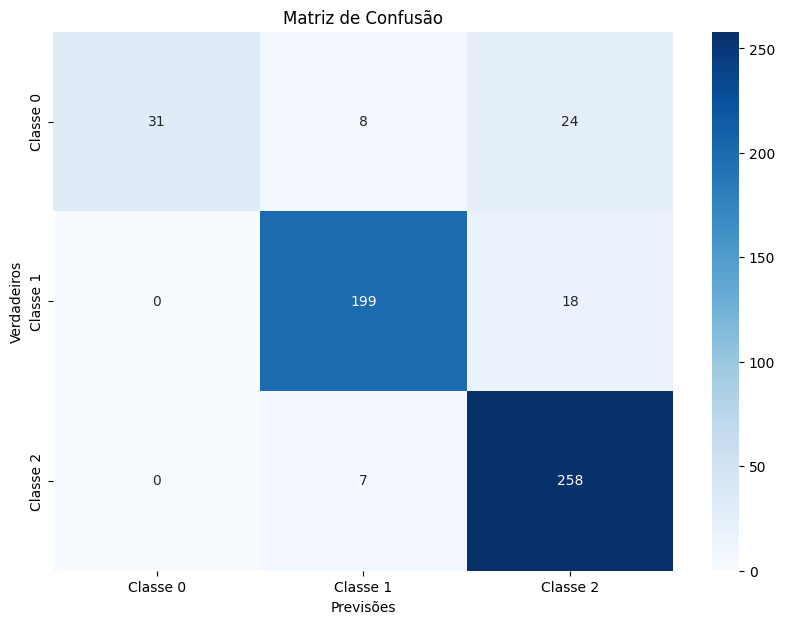

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1', 'Classe 2'], yticklabels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.xlabel('Previsões')
plt.ylabel('Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.49      0.66        63
           1       0.93      0.92      0.92       217
           2       0.86      0.97      0.91       265

    accuracy                           0.90       545
   macro avg       0.93      0.79      0.83       545
weighted avg       0.90      0.90      0.89       545

